In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
plt.style.use("seaborn-talk")

In [2]:
df = pd.read_csv("BCG-Strain.csv")

In [3]:
df.describe()

,Passage no,IS6110 (1-6),Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60
count,8.00000,12.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,657.50000,1.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,481.92323,0.492366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,172.00000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,214.50000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,546.50000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1101.00000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1331.00000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.drop(["Name during development", "Developed By", "Current Manufacturers (2017)", "Cuurent Sales Name", 
              "Used in Which countries", "Link"], axis=1)
df = df[:27]
df = df.drop(df.iloc[:, 49:61], axis = 1)
df.head()

,Internal BCG Strain ID,BCG Strain Synonyms,Originated from strain,Year of Distribution from another strain,Passage no,Country of origin,Tandem Duplications,Class,Recombinant,T Cell Epitopes Group 3,...,Place of study and date,Study population (yr),Type of study,Diagnostic criteria,Ascertainment of vaccination,Efficacy(%),Unnamed: 49,Unnamed: 52,Unnamed: 53,Unnamed: 54
0,France_Pasteur_1921,"Pasteur, 1921",None,1921,NaN,France,DU2,NaN,RD1,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Brazil_Rio_Moreau,"Moreau, Brazil, Rio, 1924, Brazilian (Moreau/R...",Pasteur (1921),1924,NaN,Brasil,DU2,DU2-I,RD16\nRD2,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Russia_Moscow_368,"Russia, Russian, Moscow, 368",NaN,1924,368.0,Russia,DU2,DU2-I,RD Russia\nRDRussia(Rv3698)\nRD2,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Japan_Tokyo_172,"Tokyo, 172, Japan, 172-1",Pasteur (1921),1925,172.0,Japan,DU2,DU2-I,RD1 - Japan\nRDJapan(Rv3405c)\nRD2,Yes,...,South Africa (1972 - 1976)\nMyanmar (1982),0-4\n0-4,TB cohort\nCase control,Hospital and clinic records/538 cases\nWHO sco...,Hospital records\nScarm documents and parental...,> 60\n38,In 1925 Dr Shiga took a seed culture from Inst...,NaN,NaN,NaN
4,Romania_192,"Romania, Rumania, 1925, 192",Pasteur (1921),1925,192.0,Romania,NaN,DU2-I?,NaN,Yes?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


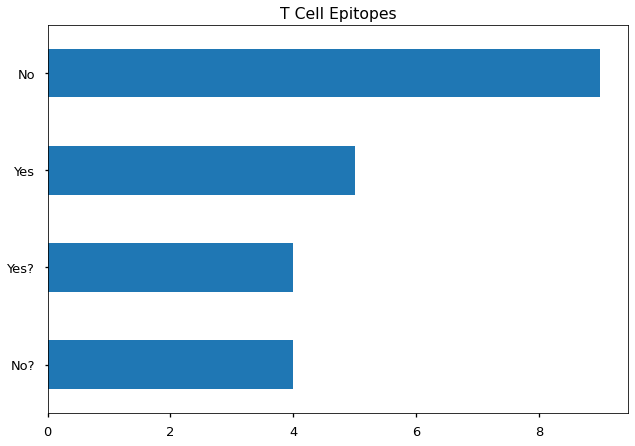

In [5]:
def graph_barplots(df, colname, title, one_col = False, sort_vals = True, tall = False):
    if one_col:
        series = df[colname].value_counts()
    else:
        series = df.filter(like = colname).sum()
    
    if sort_vals:
        series = series.sort_values()
        
    ax = series.plot(kind = "barh")
    plt.title(title)
    if tall:
        plt.gcf().set_figheight(20)
        
    plt.show()
graph_barplots(df, "T Cell Epitopes Group 3", "T Cell Epitopes", one_col = True)    

In [6]:
set(df["Internal BCG Strain ID"].dropna().unique())

{'Birkhaug',
 'Brazil_Rio_Moreau',
 'Bulgaria_Sofia_SL222',
 'Canada_Frappier_Monreal',
 'China_Beijing',
 'Czech_Republic_Prague',
 'Denmark_SSI_1331',
 'France_Pasteur_1173P',
 'France_Pasteur_1921',
 'France_Pasteur_1927',
 'Germany_S4_Jena',
 'Glaxo_1954',
 'Japan_Tokyo_172',
 'Merieux',
 'Mexico',
 'Romania_192',
 'Russia_Moscow_368',
 'Sweden_Gothenburg',
 'USA_Connaught',
 'USA_Tice'}

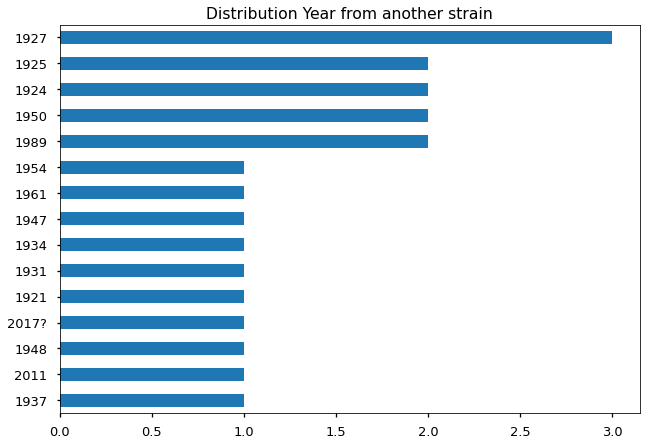

In [7]:
graph_barplots(df, "Year of Distribution from another strain", "Distribution Year from another strain", one_col = True)

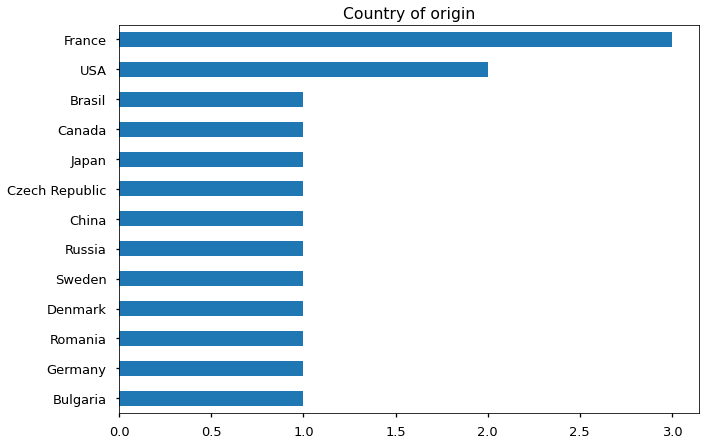

In [8]:
graph_barplots(df, "Country of origin", "Country of origin", one_col = True)

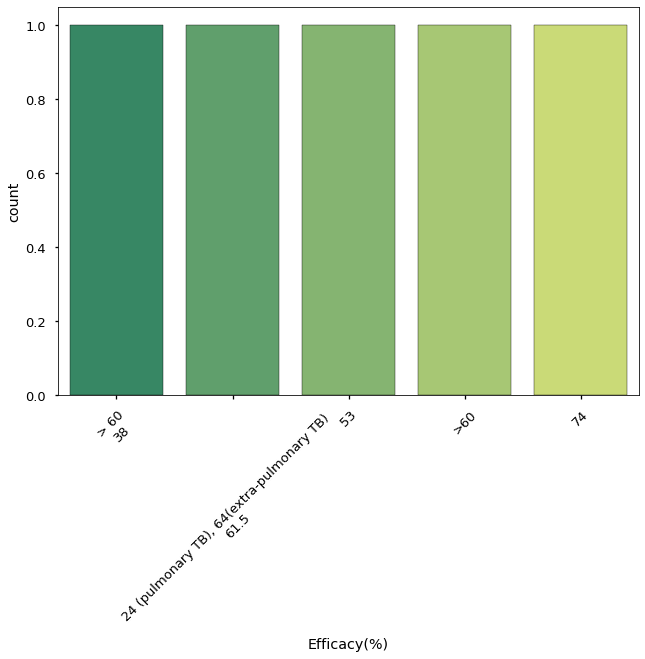

In [9]:
sns.countplot(x= 'Efficacy(%)', data = df, palette="summer",edgecolor="black")
plt.xticks(rotation=45)
plt.show()

C:\Users\Sanya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Sanya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Sanya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Sanya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: Future

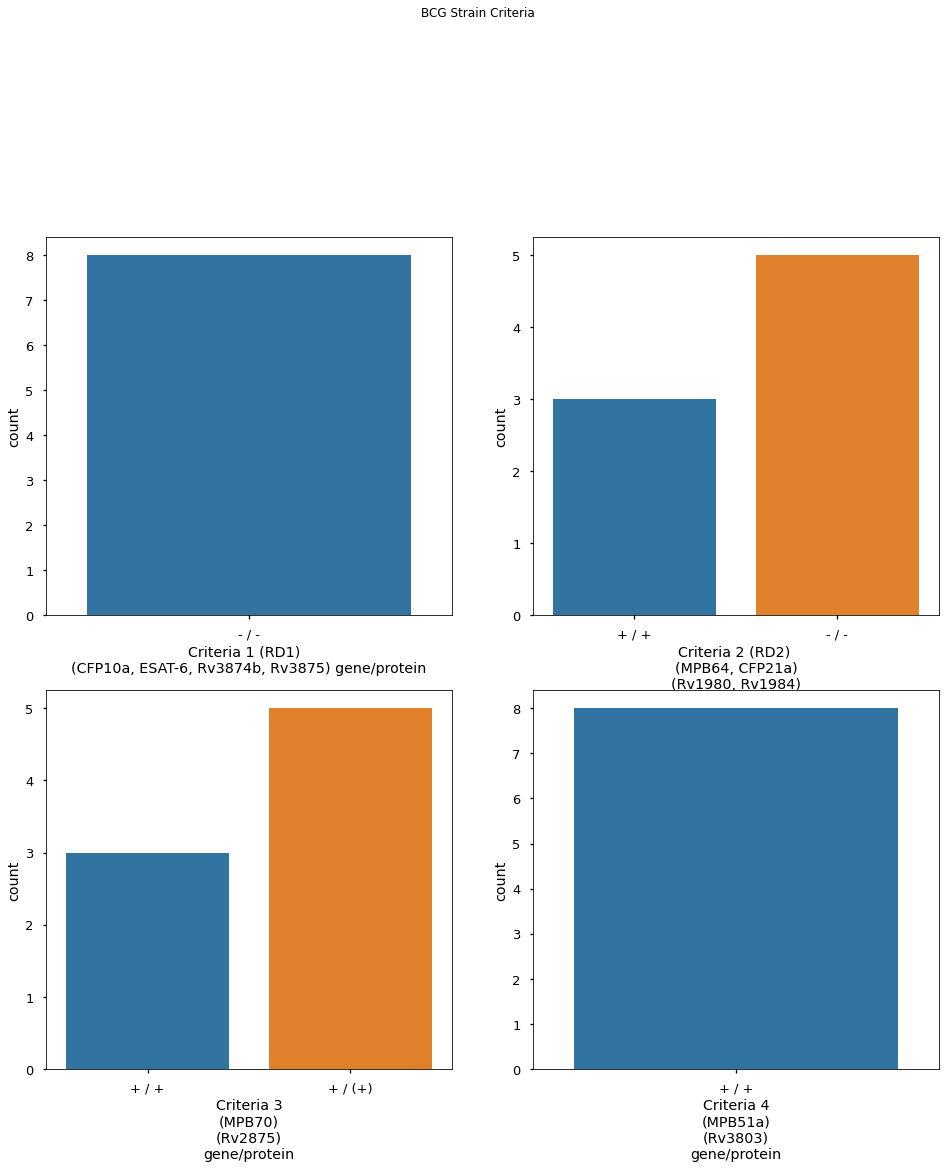

In [10]:
Criteria = ["Criteria 1 (RD1)  \n(CFP10a, ESAT-6, Rv3874b, Rv3875) gene/protein","Criteria 2 (RD2) \n(MPB64, CFP21a)\n(Rv1980, Rv1984)\n gene/protein","Criteria 3\n(MPB70)\n(Rv2875)\ngene/protein","Criteria 4\n(MPB51a)\n(Rv3803)\ngene/protein"]
plt.figure(figsize = (16,32))
for idx,col in enumerate(Criteria):
    plt.subplot(4,2,idx+1)
    sns.countplot(df[col])
plt.suptitle("BCG Strain Criteria")
plt.show()

Text(0.5, 1.0, 'BCG Strain Types')

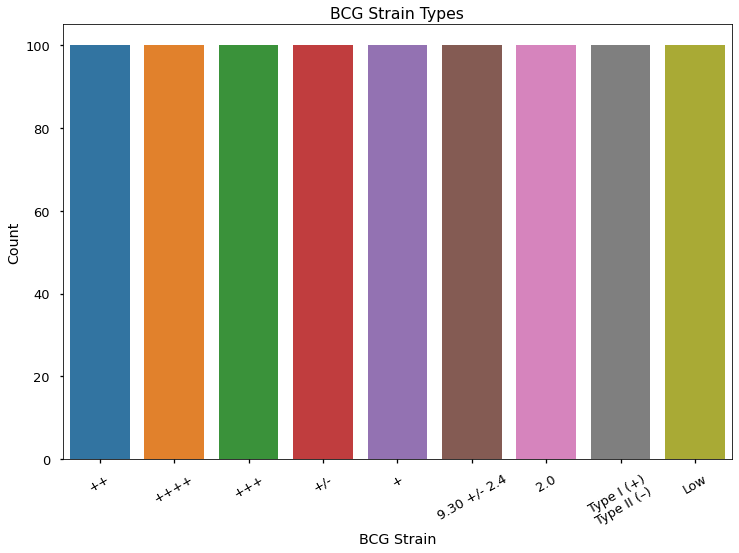

In [11]:
values = []
index  = ["++","++++","+++","+++","+++","+/-","+","+","9.30 +/- 2.4","2.0","Type I (+)\nType II (–)","+","Low"]

values.append((len(df[df['(J82 cells) \nIL-8 production']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['(J82 cells) \nIL-6 production']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['(THP-1 cells)\nIL-1beta']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['(THP-1 cells)\nIL-12']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['(THP-1 cells)\nTNF-alfa']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Niacin accumulation']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Urease']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Pyrazinamidase\nDay 4']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Catalase (room temperature)\nBubble column \n(mm)']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['IS6110 (1-6)'] != "Missing"])/df.shape[0])*100)
values.append((len(df[df['PDIM '] !="Missing"])/df.shape[0])*100)
values.append((len(df[df['Resistance to TCH\n10'] != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Catalase (room temperature)\nActivity']   != "Missing"])/df.shape[0])*100)

users = pd.DataFrame({"index":index,"value":values})

plt.figure(figsize = (12,8))
sns.barplot(x=index,
            y=values)
plt.xticks(rotation=30)
plt.xlabel("BCG Strain")
plt.ylabel("Count")
plt.title('BCG Strain Types')